In [29]:
TASK: 1

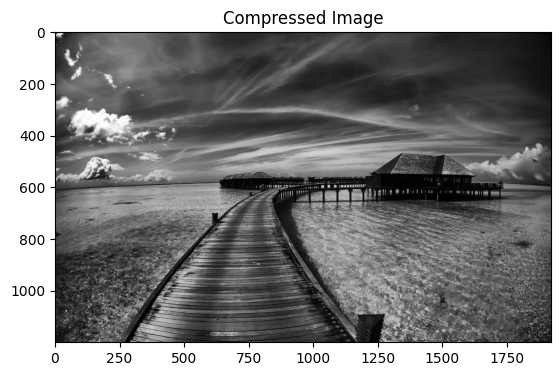

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (grayscale)
image = cv2.imread('4723250.jpg', cv2.IMREAD_GRAYSCALE)

# Perform the 2D Fourier Transform
fourier_transform = np.fft.fftshift(np.fft.fft2(image))

# Set a threshold to retain only significant frequency components
threshold = 1000 # Adjust as needed
filtered_fourier_transform = fourier_transform.copy()
filtered_fourier_transform[abs(filtered_fourier_transform) < threshold] = 0

# Perform the inverse Fourier Transform to obtain the compressed image
compressed_image = np.abs(np.fft.ifft2(np.fft.ifftshift(filtered_fourier_transform)))

# Display the compressed image
plt.imshow(compressed_image, cmap='gray')
plt.title('Compressed Image')
plt.show()


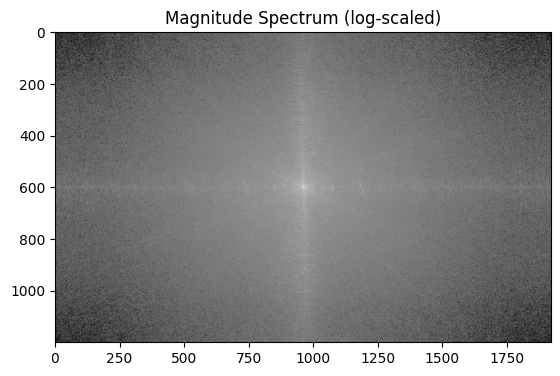

In [24]:
# Feature Extraction (Magnitude Spectrum)
# Calculate the magnitude spectrum
magnitude_spectrum = np.abs(filtered_fourier_transform)

# Display the magnitude spectrum
plt.imshow(np.log1p(magnitude_spectrum), cmap='gray')  # Using log scaling for better visualization
plt.title('Magnitude Spectrum (log-scaled)')
plt.show()



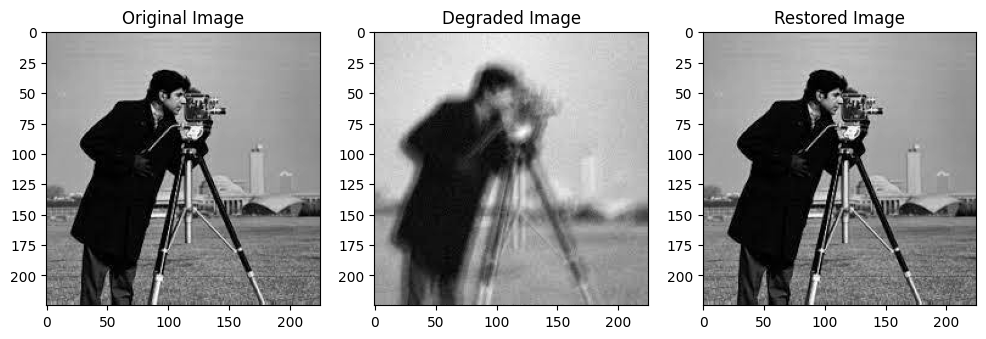

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original and degraded images (grayscale)
original_image = cv2.imread('original.jpg', cv2.IMREAD_GRAYSCALE)
degraded_image = cv2.imread('degradedd.jpg', cv2.IMREAD_GRAYSCALE)

# Ensure that both images have the same dimensions
degraded_image = cv2.resize(degraded_image, (original_image.shape[1], original_image.shape[0]))

# Perform the 2D Fourier Transform for both images
fourier_transform_original = np.fft.fftshift(np.fft.fft2(original_image))
fourier_transform_degraded = np.fft.fftshift(np.fft.fft2(degraded_image))

# Set a small constant epsilon to avoid division by zero
epsilon = 1e-6

# Regularization parameter
alpha = 0.1

# Compute the regularized inverse filter in the frequency domain
inverse_filter = np.divide(fourier_transform_original, fourier_transform_degraded + epsilon + alpha)

# Apply the inverse filter to the degraded image in the frequency domain
restored_image_frequency_domain = fourier_transform_degraded * inverse_filter

# Perform the inverse Fourier Transform to obtain the restored image
restored_image = np.abs(np.fft.ifft2(np.fft.ifftshift(restored_image_frequency_domain)))

# Display the original, degraded, and restored images
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(degraded_image, cmap='gray')
plt.title('Degraded Image')
plt.subplot(1, 3, 3)
plt.imshow(restored_image, cmap='gray')
plt.title('Restored Image')
plt.show()


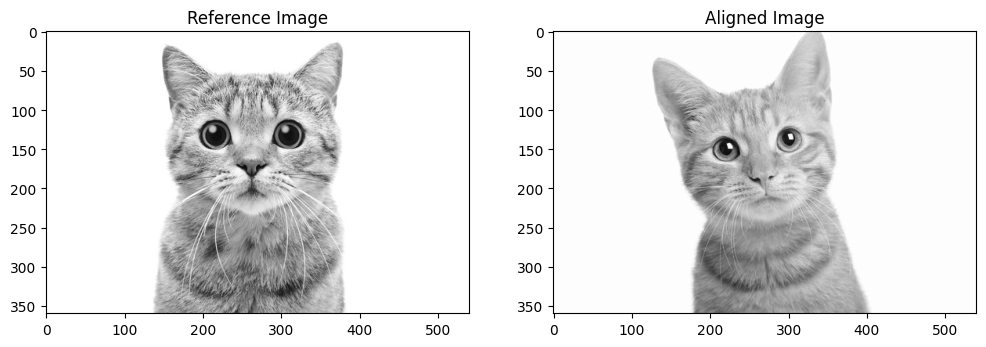

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the reference and target images (grayscale)
reference_image = cv2.imread('cat1.jpg', cv2.IMREAD_GRAYSCALE)
target_image = cv2.imread('cat2.jpg', cv2.IMREAD_GRAYSCALE)

# Ensure that both images have the same dimensions
min_height = min(reference_image.shape[0], target_image.shape[0])
min_width = min(reference_image.shape[1], target_image.shape[1])

reference_image = reference_image[:min_height, :min_width]
target_image = target_image[:min_height, :min_width]

# Perform the 2D Fourier Transform for both images
fourier_transform_reference = np.fft.fft2(reference_image)
fourier_transform_target = np.fft.fft2(target_image)

# Calculate the cross-power spectrum
cross_power_spectrum = fourier_transform_reference * np.conj(fourier_transform_target)

# Calculate phase correlation
phase_correlation = np.fft.ifft2(cross_power_spectrum / (np.abs(cross_power_spectrum) + 1e-6))

# Find the peak in the phase correlation to estimate translation
shifted_peak = np.unravel_index(np.argmax(np.abs(phase_correlation)), phase_correlation.shape)
x_shift, y_shift = shifted_peak[1], shifted_peak[0]

# Apply translation to align the images
aligned_image = np.roll(target_image, (y_shift, x_shift), axis=(0, 1))

# Display the reference and aligned images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(reference_image, cmap='gray')
plt.title('Reference Image')
plt.subplot(1, 2, 2)
plt.imshow(aligned_image, cmap='gray')
plt.title('Aligned Image')
plt.show()


In [30]:
TASK: 2

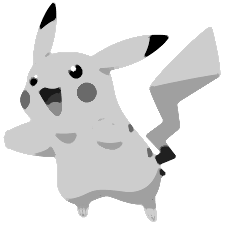

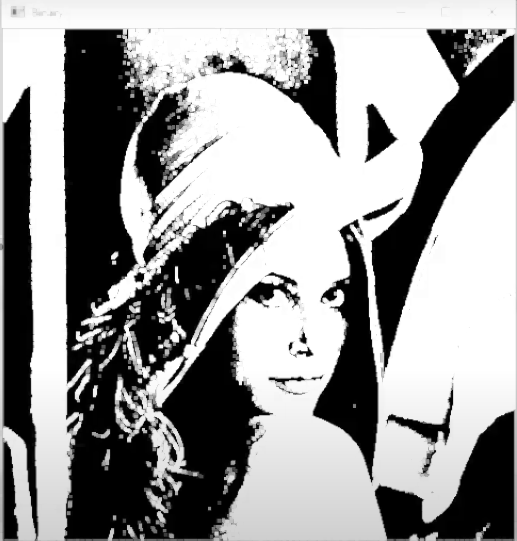

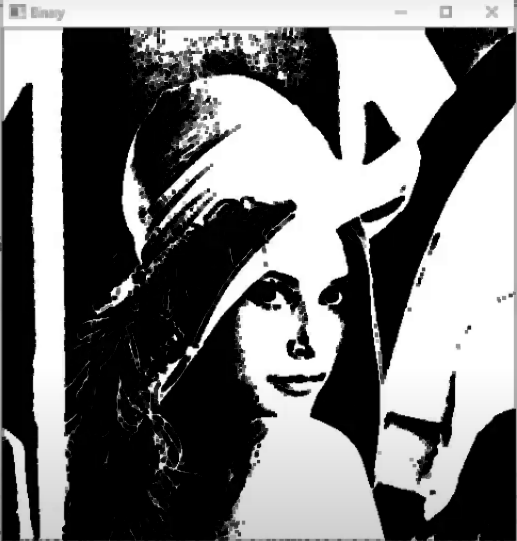

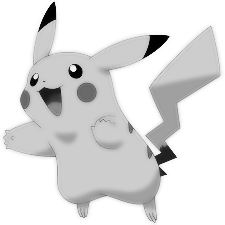

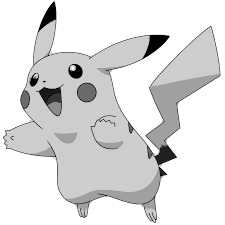

In [42]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image = cv2.imread('pic6.png', cv2.IMREAD_GRAYSCALE)
median_filtered = cv2.medianBlur(image, 5)

binary_image = cv2.imread('binary.png', cv2.IMREAD_GRAYSCALE)
max_filtered = cv2.dilate(binary_image, None, iterations=1)
min_filtered = cv2.erode(binary_image, None, iterations=1)
bilateral_filtered = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)

def adaptive_median_filter(image, size):
    result = np.copy(image)
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            window = image[max(0, y - size):min(image.shape[0], y + size + 1),
                           max(0, x - size):min(image.shape[1], x + size + 1)]
            if window.size > 0:
                median = np.median(window)
                if image[y, x] > median:
                    result[y, x] = median
    return result

adaptive_median_filtered = adaptive_median_filter(image, size=3)

cv2_imshow(median_filtered)
cv2_imshow(max_filtered)
cv2_imshow(min_filtered)
cv2_imshow(bilateral_filtered)
cv2_imshow(adaptive_median_filtered)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [35]:
TASK: 3

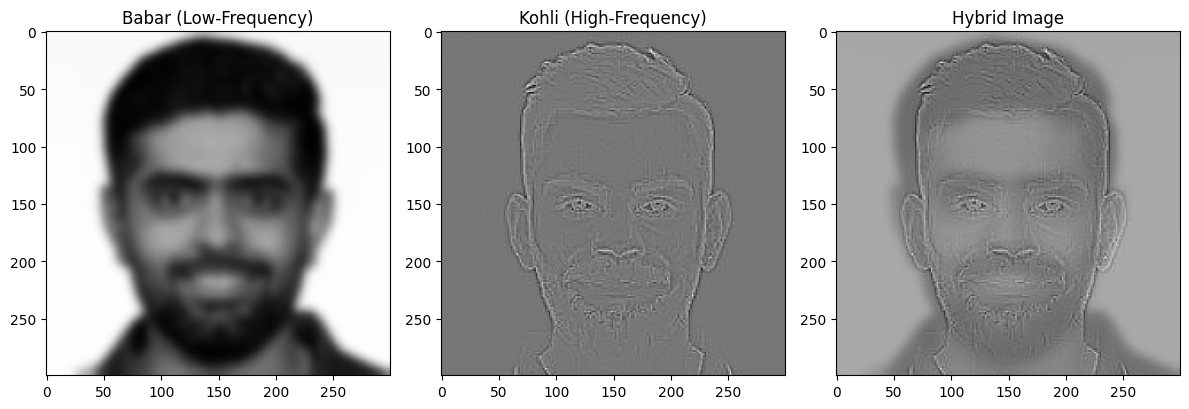

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

babar_image = cv2.imread('babarr.jpg')
babar_image = cv2.resize(babar_image, (300, 300))
kohli_image = cv2.imread('kohlii.jpg')
kohli_image = cv2.resize(kohli_image, (300, 300))

babar_gray = cv2.cvtColor(babar_image, cv2.COLOR_BGR2GRAY)
kohli_gray = cv2.cvtColor(kohli_image, cv2.COLOR_BGR2GRAY)

babar_low_pass = cv2.GaussianBlur(babar_gray, (25, 25), 0)
kohli_high_pass = cv2.Laplacian(kohli_gray, cv2.CV_64F, ksize=3)

hybrid_image = babar_low_pass + kohli_high_pass

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(babar_low_pass, cmap='gray')
plt.title('Babar (Low-Frequency)')
plt.subplot(1, 3, 2)
plt.imshow(kohli_high_pass, cmap='gray')
plt.title('Kohli (High-Frequency)')
plt.subplot(1, 3, 3)
plt.imshow(hybrid_image, cmap='gray')
plt.title('Hybrid Image')
plt.tight_layout()
plt.show()
